In [42]:
import pandas as pd
import numpy as np
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import pandas_profiling


### The dataset
>The data comes from [ClimateBC](http://climatebc.ca/) and [ClimateNA](http://climatena.ca/), two websites provided by Dr. Wang, a Professor in the Forestry Department at UBC in Vancouver. The websites provides tools to downscale meorological data from the PRISM climate group to observe long term and short term trends in the climate. With this, it is possible to choose any location in North America and receive highly detailed climate data for that location dating back to 1901.
The data is very extensive, so the difficulty lays in choosing which variables to observe and compare over time. For my project - determining the signs of climate change in ski resorts, it fits perfectly. By obtaining climate data for the location of several ski resorts in coastal and continental regions, I will be able to follow climatic trends that those regions are experiencing. Specifically the measurements {PAS - precipitation as snow} will prove useful in showing important developments for the ski resorts. Additionally, it is certainly helpful to compare the average temperature and the degree-days below 0°C {DD<0} to detect any major trends in the data. The degree-days below °C note how many days multiplied by how many degrees below freezing have occured in the measured timeline.
I expect to see an observable decline in precipitation as snow on the coastal ski resorts since those have been particularly affected by climate change.The changes in average temperature will also indicate if major changes have occured in the investigated locations. However, I also don't expect to see too many changes, potentially not even clearly destinguishable trends in the continental ski resorts. Some of the continental resorts might even show an improvement in ski conditions because climate change induced changes can even increase snowfall for continental locations for now.

In [4]:
# exploring dataframe for a specific location
# key to important variables is in (..\data\raw\README.md)
df = pd.read_csv(r'C:\Users\Len\Documents\GitHub\solo_502\course-project-solo_502\data\raw\ClimateData_Whistler.csv')

In [13]:
df.describe()
df.head()

Lat      long   elev     period  MAT   MWMT   MCMT    TD   MAP   MSP   \
0  50.1038 -122.9136   1480  year_1901   2.4   12.3   -6.2  18.5  1557   356   
1  50.1038 -122.9136   1480  year_1902   1.8   10.6   -5.9  16.6  1649   335   
2  50.1038 -122.9136   1480  year_1903   1.7   10.4   -4.4  14.8  1565   601   
3  50.1038 -122.9136   1480  year_1904   2.4   11.1   -4.6  15.8  1448   269   
4  50.1038 -122.9136   1480  year_1905   2.2   11.9   -4.9  16.9  1268   485   

   ...  RH(03)   RH(04)   RH(05)   RH(06)   RH(07)   RH(08)   RH(09)   \
0  ...       68       67       63       64       65       60       66   
1  ...       70       66       65       58       65       61       62   
2  ...       59       67       62       61       69       70       75   
3  ...       68       62       61       58       60       57       61   
4  ...       69       59       58       60       60       65       72   

   RH(10)   RH(11)   RH(12)   
0       69       76       75  
1       67       73       75  
2       67       70       74  
3       71       70       77  
4       66       67       76  

[5 rows x 251 columns]

In [40]:
# exploring the dataframe
df.iloc[:,20:50]
# df.iloc[:,50:80]
# df.iloc[:,80:110]
# df.iloc[:,110:140]
# df.iloc[:,140:170]
# df.iloc[:,170:200]
# df.iloc[:,200:230]

PAS   EMT   EXT     MAR   Eref   CMD   RH   Tmax_wt   Tmax_sp   Tmax_sm   \
0     748 -34.3  28.8 -9999.0    416   107   68      -2.0       5.9      15.3   
1     978 -34.3  28.8 -9999.0    456   128   67      -0.1       4.8      15.1   
2     763 -34.3  28.8 -9999.0    392    20   68      -2.2       4.1      15.3   
3     966 -34.3  28.8 -9999.0    504   148   66      -2.2       5.3      16.6   
4     487 -34.3  28.8 -9999.0    478   102   66      -1.5       7.1      16.5   
..    ...   ...   ...     ...    ...   ...  ...       ...       ...       ...   
114   431 -29.6  28.7 -9999.0    496   206   75       1.3       7.6      16.8   
115   566 -29.6  28.7 -9999.0    450   115   78      -0.5       7.9      14.7   
116   790 -29.6  28.7 -9999.0    437   214   77      -3.4       4.6      16.5   
117   612 -29.6  28.7 -9999.0    435   187   77      -1.7       6.3      15.2   
118   405 -29.6  28.7 -9999.0    413   110   76      -1.9       7.0      14.7   

     ...  PPT_sp   PPT_sm   PPT_at   Rad_wt   Rad_sp   Rad_sm   Rad_at   \
0    ...      297      198      521  -9999.0  -9999.0  -9999.0  -9999.0   
1    ...      433      139      435  -9999.0  -9999.0  -9999.0  -9999.0   
2    ...      279      255      690  -9999.0  -9999.0  -9999.0  -9999.0   
3    ...      392      152      275  -9999.0  -9999.0  -9999.0  -9999.0   
4    ...      282      179      520  -9999.0  -9999.0  -9999.0  -9999.0   
..   ...      ...      ...      ...      ...      ...      ...      ...   
114  ...      175      194      324  -9999.0  -9999.0  -9999.0  -9999.0   
115  ...      290      175      647  -9999.0  -9999.0  -9999.0  -9999.0   
116  ...      433       50      503  -9999.0  -9999.0  -9999.0  -9999.0   
117  ...      219      119      526  -9999.0  -9999.0  -9999.0  -9999.0   
118  ...      142      150      359  -9999.0  -9999.0  -9999.0  -9999.0   

     DD<0_wt   DD<0_sp   DD<0_sm   
0         516       167         2  
1         471       209         2  
2         488       278         1  
3         530       221         1  
4         511       113         1  
..        ...       ...       ...  
114       262        83         0  
115       414        77         1  
116       458       160         1  
117       384       149         1  
118       425       113         1  

[119 rows x 30 columns]

> It seems like there is something wrong with the Radiation data (negative radiation).
The data assumes the Value **-9999.0** instead of **NaN** as null value. 
The majority of values is invalid, hence I will probably drop the column.

In [49]:
# let's take a closer look some annual variables:
# Selecting specific columns since the dataset would be too big to run otherwise.
# Warning: loading this might take quite a bit of processing time.
df_annual = df.iloc[:,[4,5,6,12,13,16,20,26]]
df_annual.profile_report()

C:\Users\Len\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


## First observations:
- The dataframe is massive, it will require some cleaning and wrangling to draw conclusions.
- Radiation data has many invalid values
- Clear negative relationship between mean annual temperature (MAT) and degree-days below freezing (DD<0°C)
- There seems to be some form of correlation between relative humidity (RH) and the number of frost-free days (NFFD)
- Annual data is limited to draw conclusions from, since data from the summer months obstructs the view onto the more interesting winter data.

## Data Wrangling

In [107]:
# Method chaining and creating a function for all my datasets with the same format
# For analysis purposes, this function singles out the annual, seasonal and monthly variables.

def load_and_process(path_to_csv_file):
    
    # separating monthaly variables from the dataframe
    # load data and select variables of interest
    dataframe = (
                pd.read_csv(path_to_csv_file)
                .iloc[:,83:251]
    )
    
    # Create dataframe with a column of labelled years
    annual_m = np.arange(1901, 2020, 1).repeat(12)
    annual_m2 = np.vstack(annual_m)
    years_m = pd.DataFrame(data = annual_m2)
    
    # Create list of Strings for each month for the 119 years in the dataframe
    months = [('Jan','Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')*119]
    months2 = (
        pd.DataFrame(months)
        .melt()
    )
    

    # Transpose and then melt monthly observations in Dataframe to get individual variables in separate columns and the months as observations instead of variables
    global monthly_data
    monthly_data = [months2, years_m]
    for i in range(14):
        monthly_data.append(dataframe.iloc[:,i*12:(i+1)*12].T.melt())
    
    # Cleaning dataframe
    monthly_data = (
                    pd.concat(monthly_data, axis = 1)
                    .drop(columns = 'variable')
    )
    
    # Label selected columns of interest(variables)
    monthly_data.columns = ['Month','Year','Max Temp', 'Min Temp', 'Ave Temp', 'Precipitation', 'Radiation', 'DDays < 0°C', 'DDays > 5°C', 
                            'DDays < 18°C', 'DDays > 18°C', 'Frost Free Days', 'Snowfall', 'Evaporation', 
                            'Moisture Deficit', 'Relative Humidity']
    print(monthly_data)


    # separating seasonal winter variables from the dataframe for a better analysis 
    dataframe_s = (
                pd.read_csv(path_to_csv_file)
                .iloc[:,[27,31,35,39,47,51,55,59,63,67,71,75,79]]
    )
    
    # label years, fit together with rest of the dataframe
    annual_w = np.arange(1901, 2020, 1)
    annual_w2 = np.vstack(annual_w)
    years_s = pd.DataFrame(data = annual_w2)
    seasons = [years_s, dataframe_s]
    
    global seasonal_data
    seasonal_data = pd.concat(seasons, axis = 1)
    
    # label columns (variables)
    seasonal_data.columns = ['Year','Max Temp', 'Min Temp', 'Ave Temp', 'Precipitation', 'DDays < 0°C', 'DDays > 5°C', 
                            'DDays < 18°C', 'DDays > 18°C', 'Frost Free Days', 'Snowfall', 'Evaporation', 
                            'Moisture Deficit', 'Relative Humidity']
#     print(seasonal_data)


    # separating annual variables from the dataframe
    dataframe_a = (
                pd.read_csv(path_to_csv_file)
                .iloc[:,4:27]
    )
    years = [years_s, dataframe_a]
    
    global yearly_data
    yearly_data = pd.concat(years, axis = 1)
    
    # label columns (variables)
    yearly_data.columns = ['Year','Ave Temp','Warmest Month', 'Coldest Month','Difference', 'Mean Precip','May-Sep Precip','Heat-Moist I', 
                           'Summer Heat-Moist I', 'DDays < 0°C', 'DDays > 5°C', 'DDays < 18°C', 'DDays > 18°C', 
                           'Frost Free Days','Begin FFP','End FFP','Frost Free Period', 'Snowfall', 'Min Temp (30)', 'Max Temp (30)', 'Radiation',
                           'Evaporation', 'Moisture Deficit', 'Relative Humidity']
#     print(yearly_data)
    
load_and_process(r'C:\Users\Len\Documents\GitHub\solo_502\course-project-solo_502\data\raw\ClimateData_Whistler.csv')




     Month  Year  Max Temp  Min Temp  Ave Temp  Precipitation  Radiation  \
0      Jan  1901      -3.4      -8.9      -6.2            206    -9999.0   
1      Feb  1901      -1.9      -8.7      -5.3            158    -9999.0   
2      Mar  1901       2.1      -6.1      -2.0             99    -9999.0   
3      Apr  1901       4.2      -4.4      -0.1            116    -9999.0   
4      May  1901      11.2       0.1       5.7             82    -9999.0   
...    ...   ...       ...       ...       ...            ...        ...   
1423   Aug  2019      15.8       7.9      11.9             29    -9999.0   
1424   Sep  2019      10.5       5.2       7.9            179    -9999.0   
1425   Oct  2019       4.9      -1.3       1.8             91    -9999.0   
1426   Nov  2019       2.8      -2.4       0.2             90    -9999.0   
1427   Dec  2019      -0.8      -4.6      -2.7            189    -9999.0   

      DDays < 0°C  DDays > 5°C  DDays < 18°C  DDays > 18°C  Frost Free Days  \
0       

> By plugging in different datasets for different locations into the function, 
it is now possible to create single datasets for annual, seasonal and monthly variables for each location.
The datasets will be saved in the \data\processed directory:

In [ ]:
# saving output data into files

monthly_data.to_csv(r'C:\Users\Len\Documents\GitHub\solo_502\course-project-solo_502\data\processed\ClimateData_Whistler_months.csv', index=False)
seasonal_data.to_csv(r'C:\Users\Len\Documents\GitHub\solo_502\course-project-solo_502\data\processed\ClimateData_Whistler_seasons.csv', index=False)
yearly_data.to_csv(r'C:\Users\Len\Documents\GitHub\solo_502\course-project-solo_502\data\processed\ClimateData_Whistler_years.csv', index=False)

# Research questions

- Is climate change affecting ski resorts in North America? 
- How does it show?

## Subquestions
- Are there any variables in the data which show distinctive trends over the investigated time?
- Are those variables generally associated with climate change?
- How do coastal ski resorts compare to continental ski resorts?

# Analysis and visualizations of the cleaned data

> The investigation of the dataset at the beginning of this analysis showed, that annual data is very superficial.
There are many trends and many causes that can skew the data and make it improbable to find important signs of climate change in my area of interest.
Hence I will mainly look at seasonal (winter) and at monthly data to determine how climate change might be influencing the investigated ski resorts.
Because the main research looks at changes in temperature and snowfall over time, the visuals used are mainly line plots.

## Seasonal winter data

In [57]:
# exploring seasonal data 
seasonal_data.shape
seasonal_data.head(10)
seasonal_data.columns
seasonal_data.describe().apply(lambda s: s.apply(lambda x: format (x, 'f')))

Year    Max Temp    Min Temp    Ave Temp Precipitation  \
count   119.000000  119.000000  119.000000  119.000000    119.000000   
mean   1960.000000   -1.957983   -7.651261   -4.803361    579.168067   
std      34.496377    1.605895    2.130603    1.820688    157.125035   
min    1901.000000   -7.100000  -13.400000  -10.300000    200.000000   
25%    1930.500000   -2.650000   -8.850000   -5.700000    460.500000   
50%    1960.000000   -1.800000   -7.600000   -4.700000    580.000000   
75%    1989.500000   -0.950000   -6.050000   -3.450000    683.000000   
max    2019.000000    1.300000   -3.200000   -0.900000    998.000000   

      DDays < 0°C DDays > 5°C DDays < 18°C DDays > 18°C Frost Free Days  \
count  119.000000  119.000000   119.000000   119.000000      119.000000   
mean   507.941176    4.378151  2047.134454     0.000000        7.260504   
std    125.979908    2.473561   148.014768     0.000000        3.763028   
min    262.000000    1.000000  1715.000000     0.000000        1.000000   
25%    416.000000    3.000000  1938.500000     0.000000        5.000000   
50%    489.000000    4.000000  2029.000000     0.000000        6.000000   
75%    578.000000    6.000000  2133.000000     0.000000        9.000000   
max    922.000000   15.000000  2506.000000     0.000000       22.000000   

         Snowfall Evaporation Moisture Deficit Relative Humidity  
count  119.000000  119.000000       119.000000        119.000000  
mean   404.806723    0.117647         0.000000         75.949580  
std    135.508914    1.283378         0.000000          4.452858  
min    158.000000    0.000000         0.000000         66.000000  
25%    299.500000    0.000000         0.000000         73.000000  
50%    398.000000    0.000000         0.000000         75.000000  
75%    494.000000    0.000000         0.000000         78.500000  
max    701.000000   14.000000         0.000000         87.000000

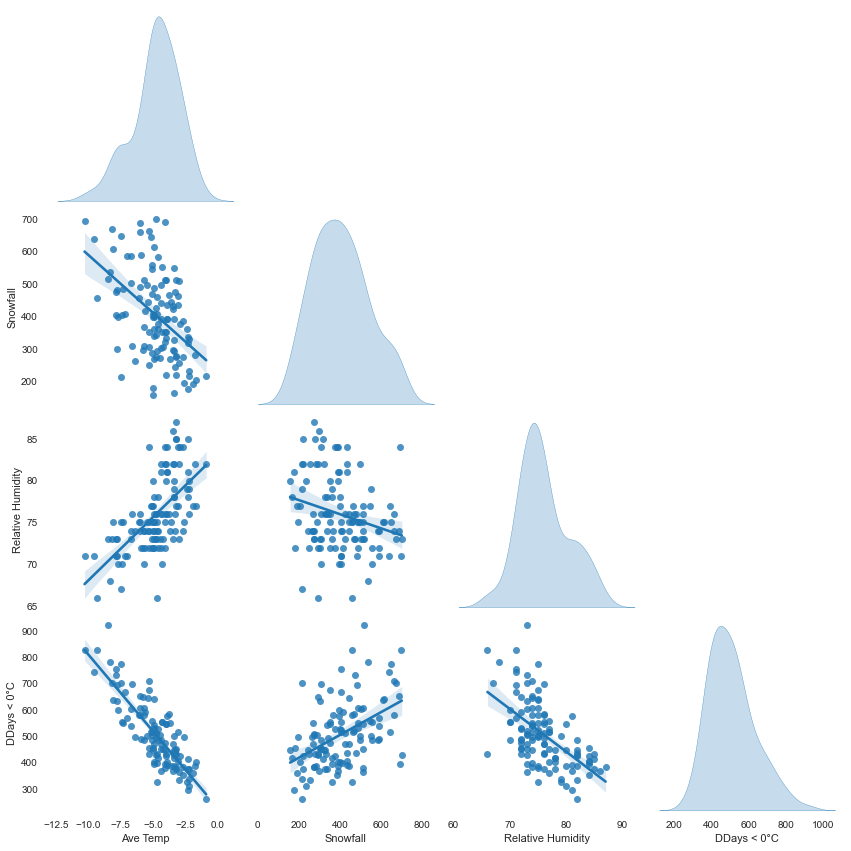

In [96]:
# Trying to observe potential correlations between different variables at seasonal observations

selected_df_winter = seasonal_data.loc[:,['Ave Temp', 'Snowfall', 'Relative Humidity', 'DDays < 0°C']]
sns.pairplot(selected_df_winter, 
             kind = 'reg', 
             diag_kind='kde', 
             height=3,
             corner=True
            )

> Just by looking at the graphs, it appears that there is a rather linear relationship between Average Temperature and Degree-days below freezing and between
Temperature and Relative Humidity. Both correlations seem reasonable. 
Other correlations between the variables are tougher to see at a first glance and might be less strong or simply not existant.

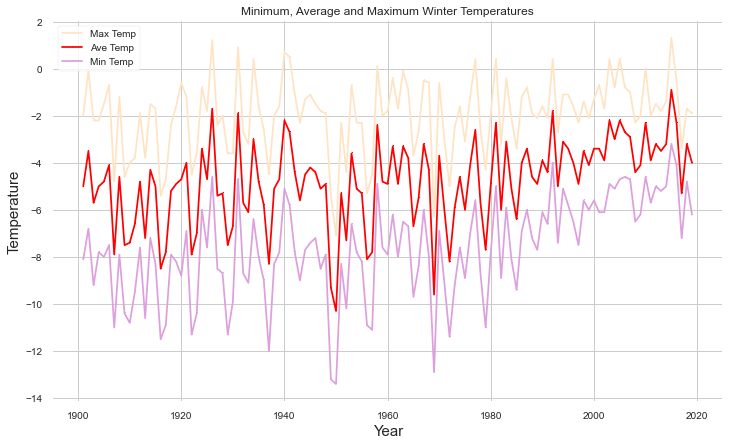

In [93]:
# Let's investigate how some variables change over time.

# Visualizing average, max, min winter termperatures over time
plt.figure(figsize = (12,7))
plt.plot(seasonal_data['Year'], seasonal_data['Max Temp'], linestyle='solid', marker=',', color='bisque')
plt.plot(seasonal_data['Year'], seasonal_data['Ave Temp'], linestyle='solid', marker=',', color='red')
plt.plot(seasonal_data['Year'], seasonal_data['Min Temp'], linestyle='solid', marker=',', color='plum')

# Creating labels and the grid
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Temperature', fontsize = 15)
plt.legend(['Max Temp', 'Ave Temp', 'Min Temp'])
plt.title('Minimum, Average and Maximum Winter Temperatures')
plt.grid(True)

> Over the years, minimum and maximum temperatures edge closer together. 
This phenomenon could be explained due to uncertainity in early temperature measurements or because of changing climatic conditions. 
However, the data also shows a slight but steady warming trend since around 1970.

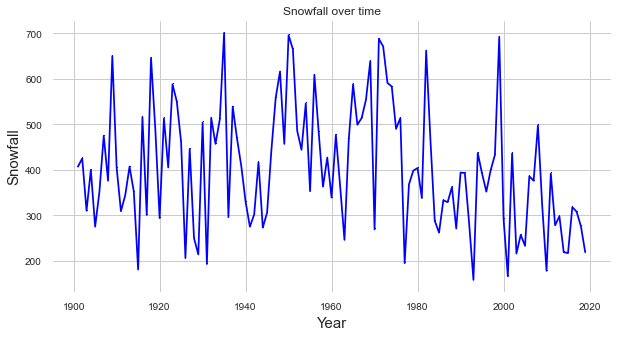

In [95]:
# Snowfall over time in the winter 

plt.figure(figsize = (10,5))
plt.plot(seasonal_data['Year'], 
         seasonal_data['Snowfall'], 
         linestyle='solid', 
         marker=',', color='blue')
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Snowfall', fontsize = 15)
plt.title('Snowfall over time')
plt.grid(True)

> There is lots of *background noise* in the data, obstructing any clear major trends. If anything, the graph shows a lower general snowfall level since 1980.

## Monthly data

In [169]:
# Specifying the months of interest. The different lists of months serves to investigate the data from different perspectives.
winter_months = ['Nov', 'Dec', 'Jan', 'Feb', 'Mar']
winter_months2 = ['Dec', 'Jan', 'Feb']

monthly_data_winter = monthly_data.loc[monthly_data['Month'].isin(winter_months2)]
monthly_data_winter = monthly_data_winter.assign(Year_month = monthly_data_winter.Year.astype(str) + ' ' + monthly_data_winter.Month.astype(str))
monthly_data_winter

Month  Year  Max Temp  Min Temp  Ave Temp  Precipitation  Radiation  \
0      Jan  1901      -3.4      -8.9      -6.2            206    -9999.0   
1      Feb  1901      -1.9      -8.7      -5.3            158    -9999.0   
11     Dec  1901      -0.6      -6.6      -3.6            177    -9999.0   
12     Jan  1902      -1.6      -8.5      -5.1            142    -9999.0   
13     Feb  1902       1.8      -5.2      -1.7            302    -9999.0   
...    ...   ...       ...       ...       ...            ...        ...   
1405   Feb  2018      -2.4      -6.3      -4.4            121    -9999.0   
1415   Dec  2018      -1.7      -5.4      -3.5            231    -9999.0   
1416   Jan  2019       0.4      -3.8      -1.7            151    -9999.0   
1417   Feb  2019      -4.4      -9.4      -6.9             24    -9999.0   
1427   Dec  2019      -0.8      -4.6      -2.7            189    -9999.0   

      DDays < 0°C  DDays > 5°C  DDays < 18°C  DDays > 18°C  Frost Free Days  \
0             210            1           750             0                1   
1             169            1           648             0                1   
11            137            2           665             0                3   
12            181            1           716             0                2   
13             89            3           548             0                3   
...           ...          ...           ...           ...              ...   
1405          146            1           622             0                2   
1415          136            2           664             0                4   
1416           99            4           612             0                6   
1417          209            0           694             0                1   
1427          117            2           639             0                5   

      Snowfall  Evaporation  Moisture Deficit  Relative Humidity Year_month  
0          161            0                 0                 76   1901 Jan  
1          139            0                 0                 71   1901 Feb  
11         108            0                 0                 75   1901 Dec  
12          99            0                 0                 71   1902 Jan  
13         163            0                 0                 72   1902 Feb  
...        ...          ...               ...                ...        ...  
1405        98            0                 0                 83   2018 Feb  
1415       139            0                 0                 89   2018 Dec  
1416        57            0                 0                 83   2019 Jan  
1417        23            0                 0                 78   2019 Feb  
1427        97            0                 0                 84   2019 Dec  

[357 rows x 17 columns]

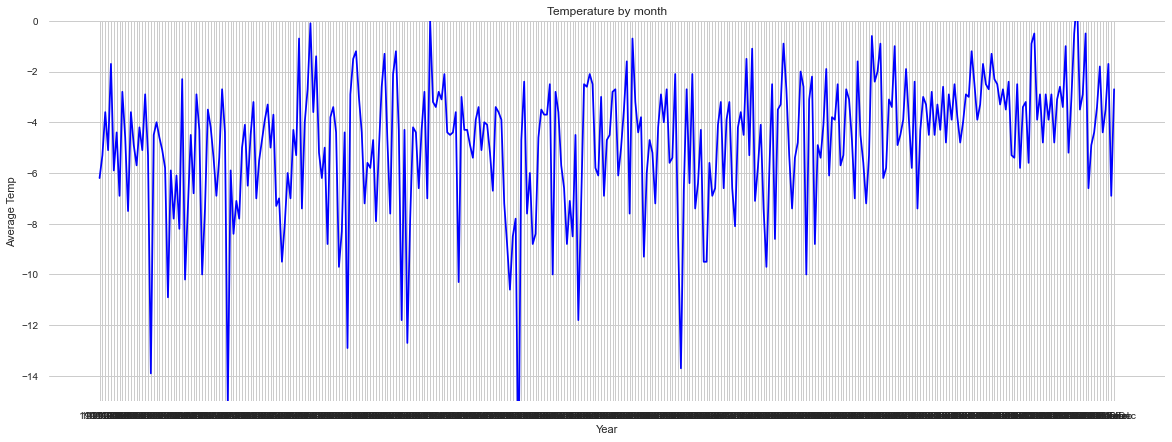

In [204]:
# plotting monthly variables and observations

winterm_temperature = (plt.figure(figsize = (20,7)),
                       plt.plot('Year_month','Ave Temp', data=monthly_data_winter, color='blue'),
                       plt.xlabel('Year'),
                       plt.ylabel('Average Temp'),
                       plt.title('Temperature by month'),
                       plt.ylim((-15,0)),
                       plt.grid(True)
)


# winterm_temperature.set_xticks(['1901 Jan','1920 Jan', '1940 Jan', '1960 Jan', '1980 Jan', '2000 Jan', '2019 Jan'])


> This is rather inconclusive, the internal variation with the monthly scale seems overwhelming. 
I will definitely need to smooth some lines to find general trends. The more recent trend show slight warming again

Text(0.5, 1.0, 'Snowfall over the winter months')

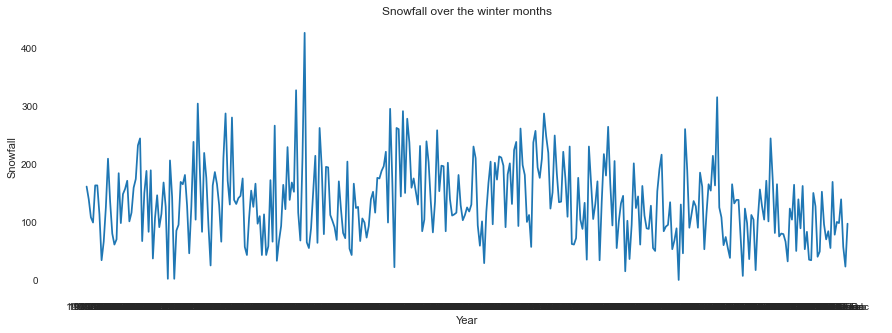

In [205]:
# Snowfall in single winter months
plt.figure(figsize = (15,5))
plt.plot('Year_month', 'Snowfall', data = monthly_data_winter)
plt.xlabel('Year')
plt.ylabel('Snowfall')
plt.title('Snowfall over the winter months')

> This is much better. It can be argued that there is a downwards trend in snowfall since the 1970s.

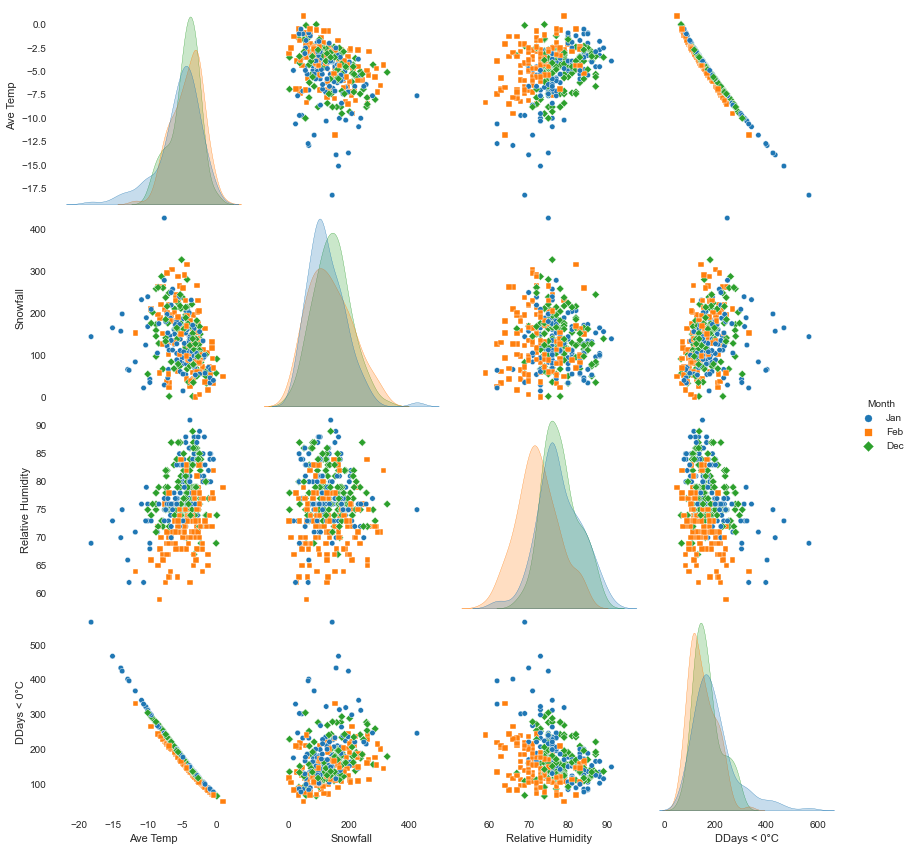

In [216]:
#Correlations depending on the month
selected_df_winter_months = monthly_data_winter.loc[:,['Month','Ave Temp', 'Snowfall', 'Relative Humidity', 'DDays < 0°C']]
sns.pairplot(selected_df_winter_months, 
             kind = 'scatter', 
             diag_kind='kde', 
             height=3,
             markers=['o','s','D'],
             plot_kws={'s':30},
             hue='Month'   # Using hue only really works for spectating a maximum of three months at a time. More months areoverwhelming.
) 


> This is rather difficult to read. Better for analyzing 2 months at a time.

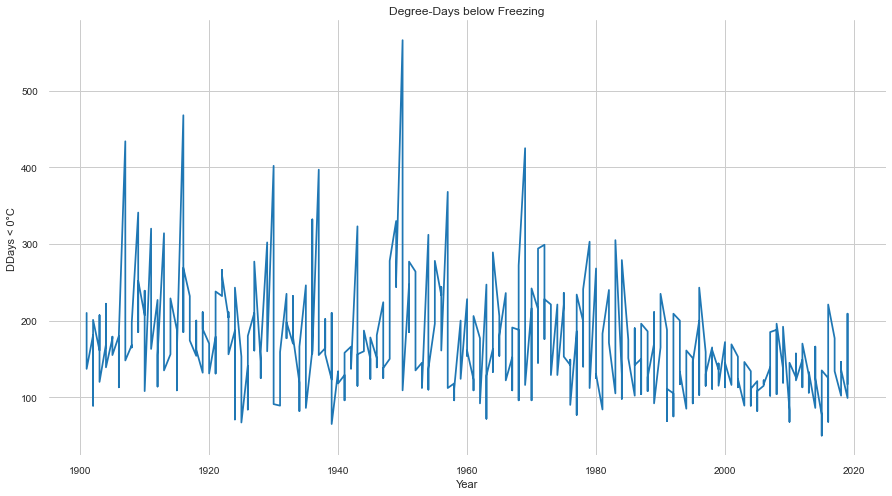

In [217]:
# Investigating how the degree-days below freezing have changed over the years
plt.figure(figsize = (15,8))
plt.plot('Year','DDays < 0°C',data = monthly_data_winter)
plt.xlabel('Year')
plt.ylabel('DDays < 0°C')
plt.title('Degree-Days below Freezing')
plt.grid(True)

> The amplitude of the data certainly decreases since the 1960s. Again, this might be due to more precise measurements in recent data. 
Similarly to the snowfall data, there seems to be a downwards trend in recent years since the 1970s. 

<AxesSubplot:xlabel='Month', ylabel='Snowfall'>

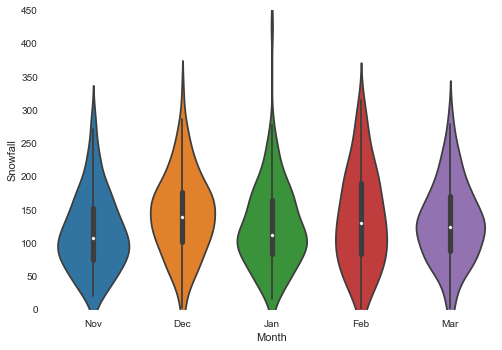

In [70]:
#Eplore what amounts of snowfall we're dealing with per month

snow_per_month = sns.violinplot(x=monthly_data_winter['Month'], y=monthly_data_winter['Snowfall'], order = ('Nov','Dec','Jan','Feb','Mar'))
snow_per_month.set_ylim([0,450])
snow_per_month


> To better undestand the results of our data and which months to use for the *winter analysis*, it is useful to compare the snowfall over the months separately.
It turns out, that the violinplots are similarly shaped even in November and March in the early and late season. 

In [ ]:
# Looking at it through a correlation matrix

# corr = monthly_data_winter.corr()
# fig, ax = plt.subplots(figsize = (20,20))
# sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, 
#             annot = True, cmap = sns.diverging_palette(220, 20, as_cmap=True))


# To do

- xlabel on monthly temperature (xticks?)
- save graphs in images folder for further comparison
- conclusions
- add trendlines
- figure out pairplot
- more/better visualisations of monthly data

# Conclusions

- Several graphs show the expected trends since around the 1970s. There is a slight increase in average temperature, snowfall and degree-days below freezing decline.
When comparing these results to climate change research, it is noticeable that the trends acutally are consistent with climatic responses on a bigger scale.
- Important note: Analysis from 1 or 10 ski resorts don't prove anything! With this data, it is possible to determine if our data agrees with general climatic developments. One big problem of climatology is that the individual event or trend can (almost) never be entirely contributed to a specific cause. Climate responses and dynamics are very complicated, hence I will not draw any bigger conclusions from my data (yet).